In [260]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import os
from statistics import mean

plt.close('all')

## mAP vs Sparsity

In [261]:
test_folder = '../runs/test/'
per_params = [0, 23.76, 39, 49.2, 56.31, 63.1, 67.56, 71.92, 75.18, 77.62, 80.18, 82.63, 84.74, 86.26, 87.51]
per_flops = [0, 13.82, 28.42, 37.35, 42.67, 47.56, 52.09, 57.17, 62.68, 66.33, 68.62, 72.49, 74.89, 77.26, 78.84]
idx = 0
results = [[] for i in range(15)]

def is_float(string):
    try:
        if float(string):
            return True
    except ValueError:
        return False

for it in os.listdir(test_folder):
    if 'iteration' in it:
        num = int(it[-2:] if it[-2:].isdigit() else it[-1])
        with open(test_folder + it + '/results.txt', 'r') as f:
            for r in f:
                val = r.split()
                for v in val:
                    if is_float(v):
                        results[num].append(float(v))
                    elif is_float(v.replace('[','')):
                        results[num].append(float(v.replace('[','')))
                    elif is_float(v.replace(']','')):
                        results[num].append(float(v.replace(']','')))
        idx += 1

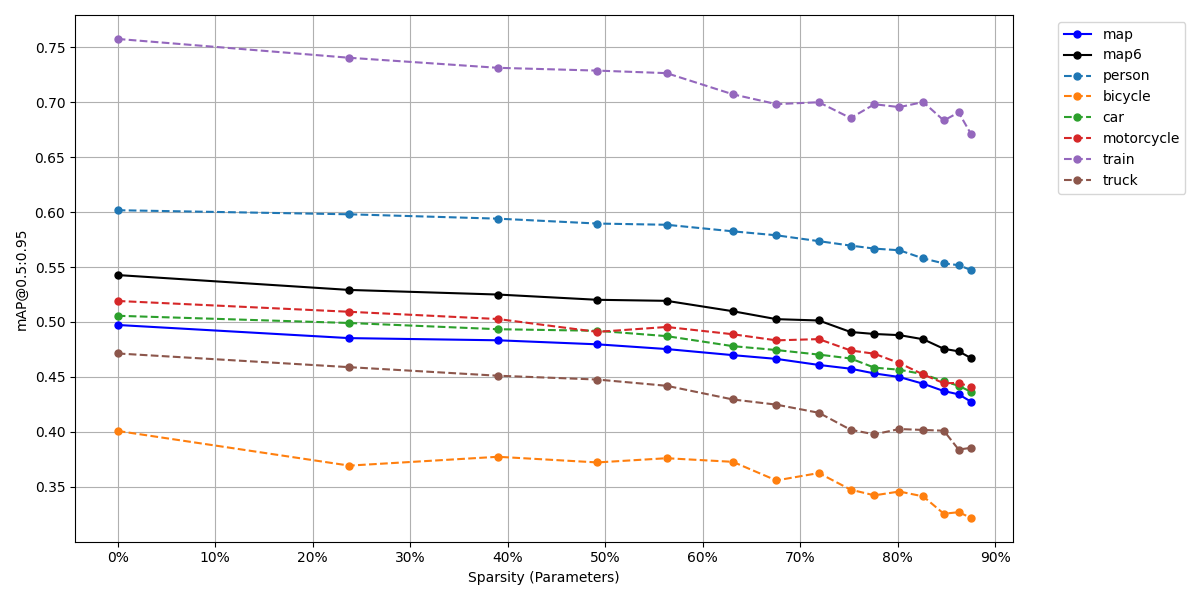

In [262]:
fig, ax = plt.subplots()
plt.plot(per_params, [results[i][0] for i in range(len(results))], 'b', marker='o', ms=5, label='map')
plt.plot(per_params, [np.mean([results[i][1+j] for j, l in enumerate(old_labels) if l in new_labels]) 
                      for i in range(len(results))], 'k', marker='o', ms=5, label='map6')

for label in new_labels:
    idx = old_labels.index(label)
    plt.plot(per_params, [results[i][1+idx] for i in range(len(results))], '--', marker='o', ms=5, label=label)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel('Sparsity (Parameters)')
plt.ylabel('mAP@0.5:0.95')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
fig.set_size_inches(12, 6)
plt.locator_params(axis='both', nbins=10)
plt.grid(True)
plt.tight_layout()
fig.savefig(output + 'ap_params.png', dpi=400)

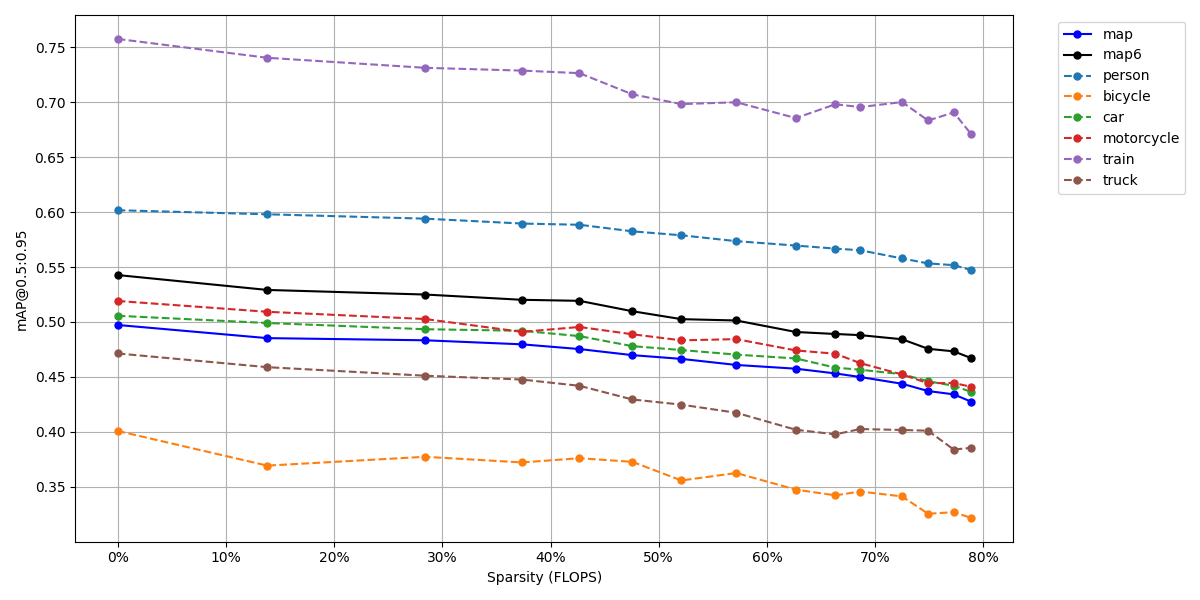

In [263]:
fig, ax = plt.subplots()
plt.plot(per_flops, [results[i][0] for i in range(len(results))], 'b', marker='o', ms=5, label='map')
plt.plot(per_flops, [np.mean([results[i][1+j] for j, l in enumerate(old_labels) if l in new_labels]) 
                      for i in range(len(results))], 'k', marker='o', ms=5, label='map6')

for label in new_labels:
    idx = old_labels.index(label)
    plt.plot(per_flops, [results[i][1+idx] for i in range(len(results))], '--', marker='o', ms=5, label=label)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel('Sparsity (FLOPS)')
plt.ylabel('mAP@0.5:0.95')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
fig.set_size_inches(12, 6)
plt.locator_params(axis='both', nbins=10)
plt.grid(True)
plt.tight_layout()
fig.savefig(output + 'ap_flops.png', dpi=400)

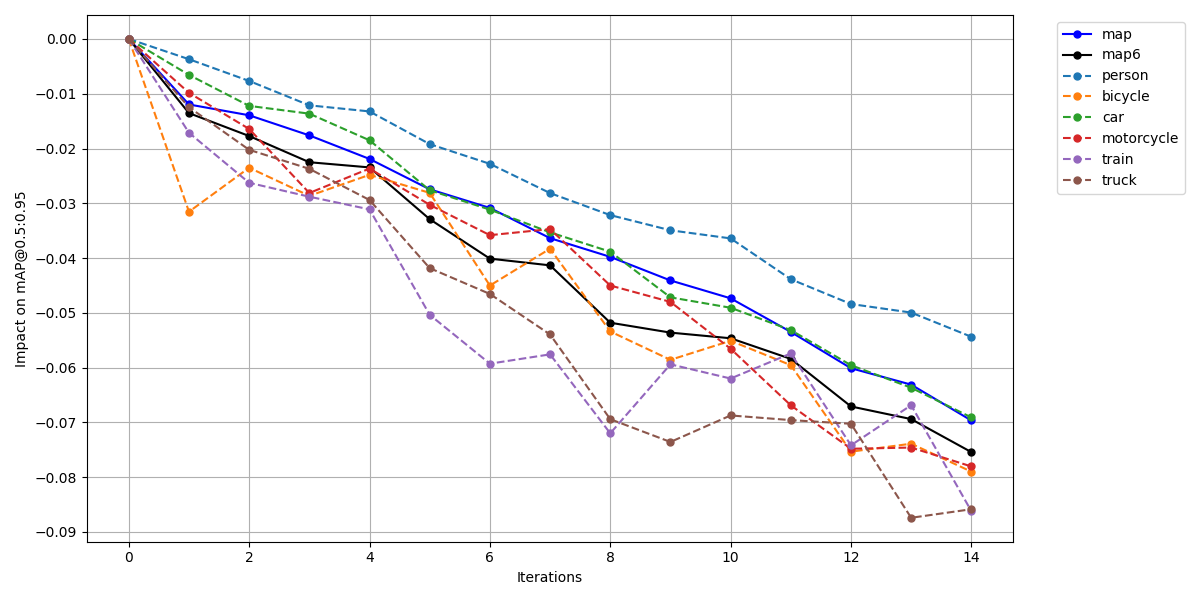

In [264]:
fig, ax = plt.subplots()
plt.plot([results[i][0]-results[0][0] for i in range(len(results))], 'b', marker='o', ms=5, label='map')
plt.plot([np.mean([results[i][1+j]-results[0][1+j] for j, l in enumerate(old_labels) if l in new_labels]) 
                      for i in range(len(results))], 'k', marker='o', ms=5, label='map6')

for label in new_labels:
    idx = old_labels.index(label)
    plt.plot([results[i][1+idx]-results[0][1+idx] for i in range(len(results))], '--', marker='o', ms=5, label=label)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.xlabel('Iterations')
plt.ylabel('Impact on mAP@0.5:0.95')
fig.set_size_inches(12, 6)
plt.locator_params(axis='both', nbins=15)
plt.grid(True)
plt.tight_layout()
fig.savefig(output + 'ap_its.png', dpi=400)

## SA for 6 classes

In [265]:
def clean(line):
    a = []
    lis = line.split(',')
    lis.pop()
    for i in range(len(lis)):
        for c in char:
            lis[i] = lis[i].replace(c, '')
        a.append(float(lis[i]))
    return a

char = '() []'

In [266]:
old_labels = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
         'hair drier', 'toothbrush']

new_labels = ['person', 'bicycle', 'car', 'motorcycle', 'train', 'truck']
output = '../graphs/'

In [267]:
folder = '../output/yolov7_training/'
layer = [[] for i in range(2)]
map_avg = [[] for i in range(2)]
map_av6 = [[] for i in range(2)]
map_cls = [[] for i in range(2)]
idx = 0

for file in os.listdir(folder):
    name = file.split('_')
    if name[0] == 'output' and '25' not in name[1]:
        with open(folder + file, 'r') as f:
            for line in f:
                if len(line) > 2:
                    lis = clean(line)
                    classes = [l for i, l in enumerate(lis[5:85]) if old_labels[i] in new_labels]
                    layer[idx].append(lis[0])
                    map_avg[idx].append(lis[4])
                    map_av6[idx].append(np.mean(classes))
                    map_cls[idx].append(classes)
        idx += 1

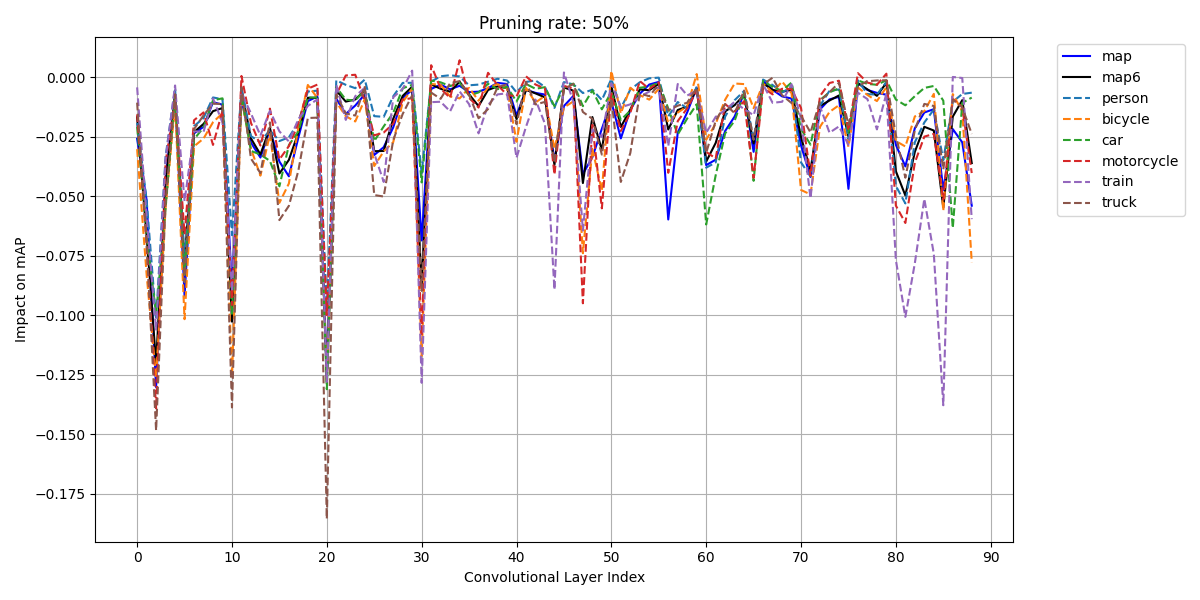

In [268]:
fig, ax = plt.subplots()
plt.plot(layer[0], [m-results[0][0] for m in map_avg[0]], 'b', label='map')
plt.plot(layer[0], [m-np.mean([results[0][1+j] for j, l in enumerate(old_labels) if l in new_labels]) 
                    for m in map_av6[0]], 'k', label='map6')

for i in range(len(new_labels)):
    plt.plot(layer[0], [m[i]-results[0][1+old_labels.index(new_labels[i])] 
                        for m in map_cls[0]], '--', label=new_labels[i])


plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.xlabel('Convolutional Layer Index')
plt.ylabel('Impact on mAP')

plt.locator_params(axis='both', nbins=10)
plt.grid(True)
plt.title('Pruning rate: 50%')
fig.set_size_inches(12, 6)
plt.tight_layout()
fig.savefig(output + 'map_test50.png', dpi=400)

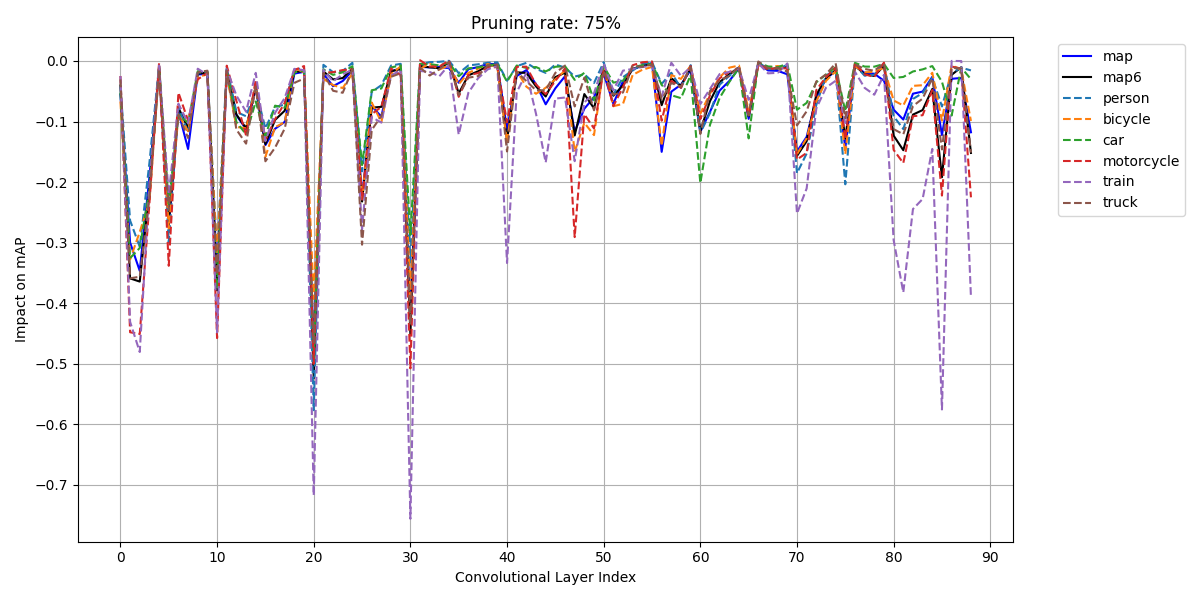

In [269]:
fig, ax = plt.subplots()
plt.plot(layer[1], [m-results[0][0] for m in map_avg[1]], 'b', label='map')
plt.plot(layer[1], [m-np.mean([results[0][1+j] for j, l in enumerate(old_labels) if l in new_labels]) 
                    for m in map_av6[1]], 'k', label='map6')

for i in range(len(new_labels)):
    plt.plot(layer[1], [m[i]-results[0][1+old_labels.index(new_labels[i])] 
                        for m in map_cls[1]], '--', label=new_labels[i])


plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.xlabel('Convolutional Layer Index')
plt.ylabel('Impact on mAP')

plt.locator_params(axis='both', nbins=10)
plt.grid(True)
plt.title('Pruning rate: 75%')
fig.set_size_inches(12, 6)
plt.tight_layout()
fig.savefig(output + 'map_test75.png', dpi=400)